 #### Necessary Libraries

In [2]:
import pandas as pd
import os

#### Merging 12 Months of Data into One

In [10]:
#Read the files names

path = './data'
for file in os.listdir(path):
    if not file.startswith('.'):
        files = os.listdir(path) 
        

#Merge the file into one
sales_data = pd.DataFrame()

for file in files:
    file_data = pd.read_csv(path + '/'+ file, sep =',')
    sales_data = pd.concat([sales_data, file_data])
    
sales_data.to_csv(path+'/sales_data.csv', index=False)

#### Read the combined data to sdata Data Frame

In [30]:
sdata = pd.read_csv(path+'/sales_data.csv', sep = ',')
sdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


#### Clean the Data

##### Task 1: Drop Rows of NAN

In [37]:
# Finding the NAN rows
Nan_rows = sdata[sdata.isna().any(axis = 1)]
display(Nan_rows.shape)

#Dropping the NAN rows
sdata.dropna(how='all', axis=0, inplace = True)

(0, 7)

##### Task 2: Find 'Or' and Delete it

In [46]:
or_rows = sdata[sdata['Order Date'].str[0:2] == 'Or']

sdata = sdata[sdata['Order Date'].str[0:2] != 'Or']

##### Cast Columns to Correct Type

In [74]:
sdata['Quantity Ordered'] = pd.to_numeric(sdata['Quantity Ordered'])
sdata['Price Each'] = pd.to_numeric(sdata['Price Each'])

<ipython-input-74-716a6f03142d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Quantity Ordered'] = pd.to_numeric(sdata['Quantity Ordered'])
<ipython-input-74-716a6f03142d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Price Each'] = pd.to_numeric(sdata['Price Each'])


 #### Add Additional Necessary Columns

###### Task 1: Add Month Column

In [76]:
sdata['Month'] = sdata['Order Date'].str[0:2]
sdata['Month'] = sdata['Month'].astype(int)

sdata.head()

<ipython-input-76-5c81499ed259>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Month'] = sdata['Order Date'].str[0:2]
<ipython-input-76-5c81499ed259>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Month'] = sdata['Month'].astype(int)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


###### Alternative

In [79]:
sdata['Month 2'] = pd.to_datetime(sdata['Order Date']).dt.month
sdata.head()

<ipython-input-79-cd9f72019cc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Month 2'] = pd.to_datetime(sdata['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,10


###### Add a Sales Column

In [81]:
sdata['Revenue'] = sdata['Quantity Ordered'].astype('int') * sdata['Price Each'].astype('float')

<ipython-input-81-0a55fe45de15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Revenue'] = sdata['Quantity Ordered'].astype('int') * sdata['Price Each'].astype('float')


###### Add a City Column

In [103]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sdata['City'] = sdata['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

<ipython-input-103-ce2a366ff472>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['City'] = sdata['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


##### Question 1: What was the best month for sales?How much was earned in that month?

In [171]:
month_sales = sdata.groupby(['Month']).sum()
month_sales.drop(['Month 2'], axis = 1, inplace=True)
month_sales.reset_index(inplace=True)

#Sorting Revenue from highest to lowest
month_sales.sort_values(by=['Revenue'], axis=0, ascending=False)


,Month,Quantity Ordered,Price Each,Revenue
11,12,28114,4.588415e+06,4.613443e+06
9,10,22703,3.715555e+06,3.736727e+06
3,4,20558,3.367671e+06,3.390670e+06
10,11,19798,3.180601e+06,3.199603e+06
4,5,18667,3.135125e+06,3.152607e+06
2,3,17005,2.791208e+06,2.807100e+06
6,7,16072,2.632540e+06,2.647776e+06
5,6,15253,2.562026e+06,2.577802e+06
7,8,13448,2.230345e+06,2.244468e+06
1,2,13449,2.188885e+06,2.202022e+06


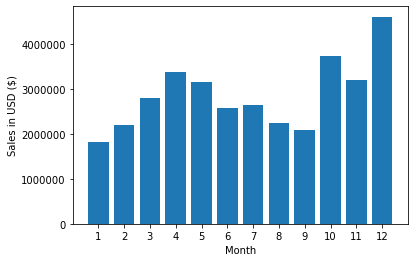

In [172]:
# Importing the pyplot namespace
import matplotlib.pyplot as plt  

plt.bar(month_sales['Month'], month_sales['Revenue'])
plt.xticks(month_sales['Month'])
plt.xlabel('Month')

plt.ylabel('Sales in USD ($)')

# Removes Scientific notation
plt.ticklabel_format(style='plain')

plt.show()

##### Question 2:  What city sold the most product?

In [182]:
city_sales = sdata.groupby(['City']).sum()

city_sales.reset_index(inplace=True)
city_sales.drop(['Month 2'], axis = 1, inplace=True)

display(city_sales.sort_values(by=['Revenue'], ascending= False))

,City,Quantity Ordered,Price Each,Month,Revenue
8,San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
4,Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
5,New York City (NY),27932,4.635371e+06,175741,4.664317e+06
2,Boston (MA),22528,3.637410e+06,141112,3.661642e+06
0,Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
3,Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
9,Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
7,Portland (OR),11303,1.860558e+06,70621,1.870732e+06
1,Austin (TX),11153,1.809874e+06,69829,1.819582e+06
6,Portland (ME),2750,4.471893e+05,17144,4.497583e+05


(10, 5)

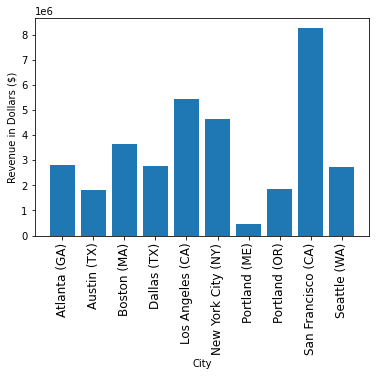

In [194]:
plt.bar(city_sales['City'], city_sales['Revenue'])

plt.xticks(city_sales['City'], rotation = 'vertical', size=12)
plt.xlabel('City')
plt.ylabel('Revenue in USD ($)')

plt.show()

##### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [211]:
# Create a hour column
sdata['Hour'] = pd.to_datetime(sdata['Order Date']).dt.hour
sdata['Count'] = 1

sdata.groupby(['Hour']).count()['Count']

<ipython-input-211-0248d3d6873c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Hour'] = pd.to_datetime(sdata['Order Date']).dt.hour
<ipython-input-211-0248d3d6873c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata['Count'] = 1


Hour
0    3910
1    2350
2    1243
3     831
4     854
Name: Count, dtype: int64

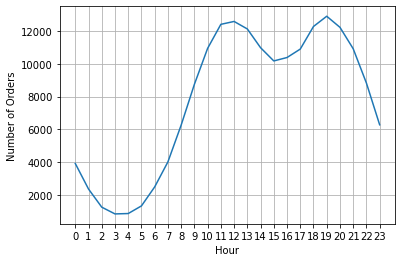

In [221]:
#Plotting Hourly Orders Line Graph
keys = [pair for pair, df in sdata.groupby(['Hour'])]

plt.plot(keys, sdata.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()

plt.show()

# Before the Peak Hours(11am and 7pm)